In [2]:
# http://yann.lecun.com/exdb/mnist/    ### Dataset Download
# pip install python-mnist==0.5        ### mnist library

# Training

유명한 손글씨 데이터인 MNIST 를 이용해서, 다양한 방식으로 딥러닝 모델을 학습해보도록 하자

- Optimization 방법을 이용하여 training 속도를 높여준다.
- 기존에 배운 Ridge model 이 아닌, 새롭게 배우는 overfitting 방지법인 Dropout 의 개념을 이해하고 코드로 구현한다.
- Training 하는 동안 layer 들을 하나하나 정규화 시켜주는 batch normalization 을 실습해 보도록한다.

### Import Library

In [3]:
import numpy as np

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

import random

import torch.utils.data as data_utils
from torch.utils.data import DataLoader

In [5]:
from mnist import MNIST

import matplotlib.pyplot as plt

Check GPU and fix the random seed

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cuda


### 2. Import dataset

In [7]:
mnist = MNIST('./MNIST')
mnist.gz = True
x_train, y_train = mnist.load_training()
x_test, y_test = mnist.load_testing()

In [8]:
# raw data 의 형태를 확인
print(len(x_test))
x_test[:3]

10000


[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


### 3. Data Preprocessing

In [9]:
# data 는 list 형식을 되어 있으므로 shape 을 보고, 이미지 visualization 을 하기 편한 array 형태로 바꾸어준다.

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [10]:
 x_test.shape # 28*28 = 784

(10000, 784)

### Explore data

In [11]:
len(x_train)

60000

In [12]:
len(x_test)

10000

### Data visualization

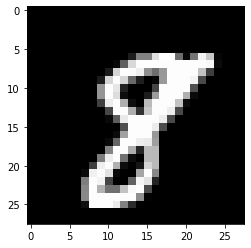

number 8


In [13]:
plt.imshow((np.array(x_train[55]).reshape(28, 28)), cmap='gray')
plt.show()
print("number", y_train[55])

### MNIST dataset 을 dataloader 를 이용해서 실제 변수에 담기

In [14]:
batch_size = 1000
train_data = data_utils.TensorDataset(torch.FloatTensor(x_train), torch.FloatTensor(y_train))

trainloader = data_utils.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [15]:
len(train_data)

60000

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

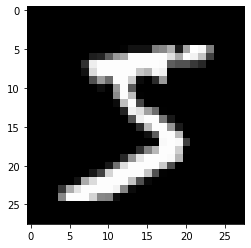

tensor(5.)


In [16]:
for X, y in train_data:
    print(X)
    plt.imshow(X.reshape(28,28), cmap='gray')
    plt.show()
    print(y)
    break

##### Dataloader 함수를 자세히 뜯어보자

dataloader 에는 배치사이즈만큼 묶여서 x_data와 y_data 가 pair 로 묶여있다.

In [17]:
length = len(trainloader)
print("{}개의 image 가 batch size {}개로 묶여서 총 {} 개의 batch 묶음이 생겼다".format(len(x_train),batch_size, length))

60000개의 image 가 batch size 1000개로 묶여서 총 60 개의 batch 묶음이 생겼다


tensor(0.)


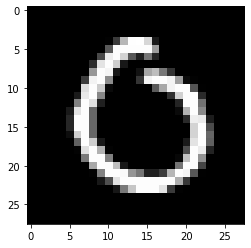

In [18]:
for batch_idx,(x_data, y_data) in enumerate(trainloader):
    plt.imshow(x_data[0].numpy().reshape(28,28), cmap = 'gray')
    print(y_data[0])
    break

### Build Model USING Sequential Method

In [19]:
# 뉴럴 layer 설정
linear1 = torch.nn.Linear(784, 256)
linear2 = torch.nn.Linear(256, 64)
linear3 = torch.nn.Linear(64, 10)

relu = torch.nn.ReLU()

In [20]:
# Sequential 을 이용해 model 설정
# 위의 뉴럴 layer 들을 가지고 온다
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3)

In [21]:
model = model.to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

### Set parameters

In [22]:
epoch = 15
learning_rate = 0.01
weight_decay = 1e-5

Cross Entropy 의 중요한 점은<br>
"The losses are averaged across observations for each minibatch."<br>
즉 미니배치들의 ` 평균 값` 을 구해준다는 것이다. <br><br>
ex) mini batch size 가 32면 32개 image data 의 loss 값의 평균을 구해준다<br>
이는 나중에 epoch 마다 loss 값을 구할 때 꼭 고려되어야 하는 부분이다.<br>
(= 모든 이미지 갯수만큼이 아닌, ` mini batch 의 갯수` 만큼 나누어준다)

In [23]:
# CrossEntropyLoss 내에 Softmax function 이 포함되어 있으므로 따로 설정해줄 필요 없다
loss_function = torch.nn.CrossEntropyLoss()

# 먼저 optimizer 는 SGD 로 설정
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay=weight_decay)

### Model train (SGD)
- 1. Optimizer 는 SGD 방법을 사용
- 2. X input 을 받는 model 은 y_predict 변수에 넣어준다
- 3. 정의한 loss function 을 이용해서 loss 를 구한 후
- 4. back propagation 으로 gradient 를 구해간다
- 5. optimizer_SGD.step() 으로 weight 를 update 한다

### Model train (SGD)
- 1. for 문에 epoch 를 담아주고
- 2. 그 안에 또다시 for 문을 하나 더 담아서 mini batch 를 하나씩 돌린다
- 3. mini batch 마다 image 와 label 을 하나씩 불러와서 to(device) 를 써서 GPU 메모리 위에 올려놓은 후
- 4. optimizer.zero_grad 로 weight 를 초기화 한후
- 5. model 에 image 를 넣어서 prediction 값을 뽑아낸 후
- 6. 미리 정의해둔 loss function 으로loss 값을 얻어낸다.
- 7. loss.backward 를 사용하여 
- 8. optimizer.step() 을 이용해 weight 값을 update 한 후 for 문이 다 돌때까지 기다림

In [ ]:
# Model Train(SGD)

loss_list = []

for epoch_num in range(epoch):
    average_cost = 0
      
    for batch_idx, (x_data, y_label) in enumerate(trainloader):
        num_of_mini_batch =  len(trainloader)
            
        # train 시킬 image data
        input_image = x_data.to(device)
        label = y_label.to(device)
                
        # Gradient 초기화
        optimizer.zero_grad()
        
        # Model 에 train data를 넣고 predict 값 산출
        y_predict = model(input_image)
        
        # Loss fucntion 에 넣어서 계산하기 위해 y data의 type 을 바꿔준다
        y_label_long = torch.tensor(label, dtype=torch.long)
        y_label_long = y_label_long.to(device)
        
        # 배치 한 묶음안에 있는 image 의 평균 loss 값이 저장
        loss = loss_function(y_predict, y_label_long)
        if batch_idx % 10 == 0:
            print("loss value %.5f" %(loss.item()))
            
        # Back Propagation
        loss.backward()
        
        # Optimizer 를 한 step 내딛는다 -> weight값을 update한다.
        optimizer.step()
            
        # epoch 마다 평균 loss 를 구하기 위해 average loss 값을 update
        # loss.item() 명령어를 내려서 연산이 가능하게 바꾸어준다
        # print(type(loss)) => 'torch.Tensor'
        # print(type(loss.item())) => 'float'
        average_cost = average_cost + (loss.item()/num_of_mini_batch)
        
        # loss 는 mini batch 하나의 평균 loss 가 들어가있다
        loss_list.append(loss.item())
        
    # epoch 마다 평균 loss 값을 print
    print("epoch {} 의 평균 loss 값은 ==> {:.5f}".format((epoch_num+1), average_cost))

C:\Users\wodnr\AppData\Local\Temp\ipykernel_4240\1210364387.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_label_long = torch.tensor(label, dtype=torch.long)


loss value 12.58143
loss value 3.17862
loss value 1.55914
loss value 1.38391
loss value 1.07993
loss value 1.48603
epoch 1 의 평균 loss 값은 ==> 13.40536
loss value 0.89031
loss value 1.53338
loss value 0.82559
loss value 0.85791
loss value 0.65835
loss value 0.57553
epoch 2 의 평균 loss 값은 ==> 0.74733
loss value 0.57409


### Epoch 1 (첫번째 epoch) 의 loss 값을 계산

In [ ]:
# epoch 하나당 60개의 batch 묶음
epoch_loss = 0
for i in range(60):
    epoch_loss = epoch_loss + loss_list[i]
    
print(epoch_loss/60)

### Check Loss value and plotting

In [ ]:
# 60000개를 1000 배치로 나누었을때 60이 되므로 epoch 하나당 60 묶음의 배치가 학습이된다
# 15 epoch 이므로 900 묶음의 배치가 학습이 되게 되고 list 에 append 되는 loss value 도 900 개가 된다.
print("loss_list의 길이 =",len(loss_list))

In [ ]:
loss_list[:10]

In [ ]:
# 처음부터 그리면 초반 5개 정도는 loss 값이 급격하게 낮아지므로 변화량을 제대로 확인하기가 어렵다.
plt.plot(np.array(loss_list[15:]), 'r')

### Loss list의 값을 저장

In [ ]:
loss_list

In [ ]:
# plot 비교를 위해 pickle 형태로 저장
import pickle

# wb - 바이트 형식으로 저장

with open('SGD.pickle', 'wb') as f:
    pickle.dump(loss_list, f)

### Test and check the accuracy

In [88]:
test_data = data_utils.TensorDataset(torch.FloatTensor(x_test), torch.FloatTensor(y_test))

testloader = data_utils.DataLoader(test_data, batch_size = 5000, shuffle=False)

In [91]:
# test data 는 gradient 를 계산할 필요가 없다
with torch.no_grad():
    num_total_data = 0
    correct = 0 # 맞는 것의 갯수를 count
    for batch_idx, (images, labels) in enumerate(testloader):
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        outputs_softmax = torch.nn.functional.softmax(outputs)
        
        # softmax 를 이용해 probability 가 가장 큰 index 를 가져옴
        predicted = torch.argmax(outputs_softmax, dim=1)
        
        # len(images) 는 결국 배치 size 를 나타내는 것이므로 batch size 를 계속 더해주면 data 의 총 길이가 된다.
        num_total_data += len(images)
        
        # 맞게 예측한 것만 세어야하는데 이때 쓸 수 있는 좋은 방법은 (True is equal to 1) 를 이용하는 것이다.
        # itme() 을 해주면 tensor type 을 벗어던지고 단순한 float 형으로 다시 태어날 수 있다.
        answer = sum(labels==predicted).item()
        correct += answer
        
print("SGD 를 이용한 모델의 정확도는 {:.5f}%".format((correct/num_total_data)*100))

C:\Users\wodnr\AppData\Local\Temp\ipykernel_13340\262613041.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs_softmax = torch.nn.functional.softmax(outputs)


SGD 를 이용한 모델의 정확도는 10.71000%


### Check the accuracy using Original Image & Predicted Label

예측한 숫자는 3이다


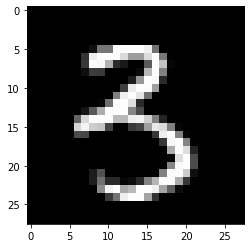

In [32]:
print("예측한 숫자는 {}이다".format(predicted[0]))
plt.imshow(images[0].cpu().reshape(28,28), cmap = 'gray')

## Bonus

### ☆ One-hot Encoding

one hot Encoding 을 구현하기 위해 random 한 난수를 생성

In [96]:
nb_classes = 10

idx = np.random.permutation(nb_classes)
ex_list = [x for x in idx]

In [97]:
ex_list

[4, 3, 0, 7, 8, 5, 9, 1, 6, 2]

In [100]:
# np.eye 는 diagonal entry 가 1 인 행렬을 가리킨다
# ex_list 에는 숫자가 있으므로 각 숫자에 맞는 row 를 가져오게 된다 (index 에 맞는 대각 1짜리 행렬이 있으므로)
one_hot_targets = np.eye(nb_classes)[ex_list]
y_train_onehot = one_hot_targets

In [99]:
y_train_onehot

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])